# Problema 8

In [1]:
# uncomment to install missing libraries
# install.packages('nnet')
# install.packages('caret')
# install.packages('cclust')

In [2]:
options(repr.plot.width=6, repr.plot.height=6)

In [3]:
library(MASS)
library(nnet)
library(caret)
set.seed (4567)

Warning message:
"package 'caret' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"

## Permeabilitat de roques amb la xarxa MLP [R]

Es disposa de 48 mesures de roques d'un dipòsit de petroli. L'objectiu és modelar la permeabilitat en funció de l'àrea, el perímetre i la forma. En primer lloc transformem les dades per ajudar a l'ajust del model:

In [4]:
library(datasets)
data(rock)
?rock
rock.x <- data.frame(area = scale(rock$area), perim = scale(rock$peri), shape = scale(rock$shape))
rock.y <- log(rock$perm)

Entreneu una xarxa MLP per aprendre la tasca. Donat el baix número d'exemples, useu leave-one-out cross-validation i regularització per trobar la millor xarxa. Per avaluar el model, feu una gràfica de resposta predita vs. observada i guieu-vos per l'error quadràtic predictiu.

In [5]:
head(rock)
N <- nrow(rock)
N

area,peri,shape,perm
<int>,<dbl>,<dbl>,<dbl>
4990,2791.90,0.0903296,6.3
7002,3892.60,0.1486220,6.3
7558,3930.66,0.1833120,6.3
7352,3869.32,0.1170630,6.3
7943,3948.54,0.1224170,17.1
7979,4010.15,0.1670450,17.1


[1] 48

Per a veure quin tipus de dades son veurem el seus histogràmes

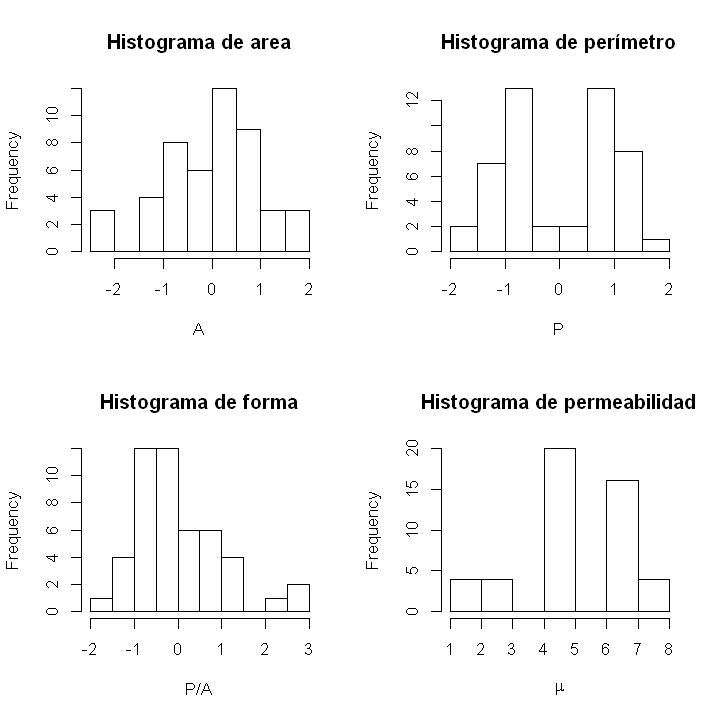

In [6]:
par(mfcol=c(2,2))
hist(rock.x$area, main="Histograma de area", xlab="A")
hist(rock.x$shape, main="Histograma de forma", xlab="P/A")
hist(rock.x$peri, main="Histograma de perímetro", xlab="P")
hist(rock.y, main="Histograma de permeabilidad", xlab=expression(mu))

Es pot apreciar que tant l'àrea com la forma semblen ser normals; el perímetre sembla ser una combinació de normals i la permeabilitat no te ben definida la seva "normalitat".

Si presentem les dades respecte a la permeabilitat obtindrem el següent:

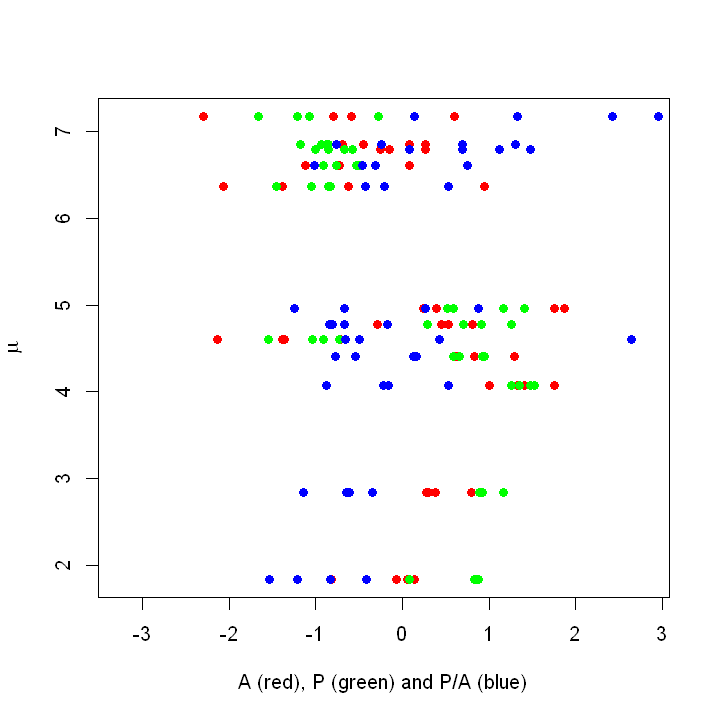

In [7]:
plot(rock.x$area, rock.y, col="red", pch=19, asp=1, xlab="A (red), P (green) and P/A (blue)", ylab=expression(mu))
points(rock.x$peri, rock.y, col="green",pch=19, asp=1)
points(rock.x$shape, rock.y, col="blue",pch=19, asp=1)

Les dades d'àrea, perímetre i forma s'alineen en bandes concretes de permeabilitat.

Primerament hem de definir quantes dades disposarem per l'aprenetatge i quantes per la prova.

Seleccionarem a l'atzar 5/6 i 1/6 de les dades.

In [8]:
set.seed(43)

learn <- sample(1:N, round(5*N/6))

nlearn <- length(learn)
ntest <- N - nlearn

Farem servir un modelatge no lineal amb un MLP mitjançant la funció nnet().

In [9]:
?nnet

Prepararem tres models, un amb totes les dades, i els altres dos amb dades independents i relacionades.

Primerament necesitem escalar les dades per a que el model funcioni correctament.



In [10]:
rock.scaled <- scale(rock)
perm <- log(rock$perm)
rock.sum <- data.frame(rock.x, perm)

I després creem el model amb totes les dades.

In [11]:
model.nnet <- nnet(perm ~., data = rock.sum, subset=learn, size=2, maxit=500, decay=0, linout = TRUE)

# weights:  11
initial  value 1123.861262 
iter  10 value 26.350641
iter  20 value 12.611025
iter  30 value 9.444761
iter  40 value 7.981863
iter  50 value 7.401326
iter  60 value 7.049006
iter  70 value 6.961036
iter  80 value 6.942333
iter  90 value 6.880056
iter 100 value 6.878624
final  value 6.878410 
converged


Aquest es el valor final de l'error

In [12]:
model.nnet$value

[1] 6.87841

Sobre el model donem un ull als valors ajustats i residuals.

In [13]:
fval_res <- cbind(matrix=model.nnet$fitted.values, model.nnet$residuals)
colnames(fval_res) <- c("Fit. val.", "Residuals")
print(fval_res)

   Fit. val.   Residuals
24  4.637180  0.31864707
43  6.754654  0.41546604
3   2.268472 -0.42792214
32  6.778355  0.01286677
14  4.637249 -0.22566312
48  6.778360 -0.41533171
29  6.707924  0.08329731
21  4.637162  0.31866534
8   2.268347  0.57073138
35  6.778359  0.07810283
15  4.637130 -0.22554504
6   2.270300  0.56877807
47  6.771476 -0.40844830
10  4.565882  0.21324123
17  4.637078 -0.56634342
23  4.637163  0.31866419
40  6.102380 -1.49720969
7   2.757243  0.08183533
1   2.313907 -0.47335771
4   2.268455 -0.42790545
28  6.738657 -0.13200693
36  6.778355  0.07810729
5   2.280783  0.55829572
30  6.676996  0.11422522
9   4.636742  0.14238151
42  6.659274  0.51084544
20  4.095511 -0.02477668
13  4.637246 -0.22566033
38  4.902545 -0.29737468
45  6.312180  0.05084839
18  4.128029 -0.05729420
46  6.079185  0.28384295
22  4.637198  0.31862948
25  5.689161  0.91748908
16  4.637261 -0.22567552
27  6.775712 -0.16906148
31  6.749535  0.04168647
26  6.454676  0.15197438
34  6.777824  0.07863810


I als pessos

In [14]:
model.nnet$wts

[1]  -5.0411924  10.3682420 -19.2779729  -1.7112817  26.3564109  33.5601720
 [7] -47.0815404  -0.5230027   2.2683471   2.1412008   2.3688119

In [15]:
summary(model.nnet)

a 3-2-1 network with 11 weights
options were - linear output units 
 b->h1 i1->h1 i2->h1 i3->h1 
 -5.04  10.37 -19.28  -1.71 
 b->h2 i1->h2 i2->h2 i3->h2 
 26.36  33.56 -47.08  -0.52 
  b->o  h1->o  h2->o 
  2.27   2.14   2.37 

El model consta de 5 neurones i 11 pessos

Un cop tenim el model separarem les dades de prova.

In [16]:
testData <- rock.sum[-learn,]

Amb aquestes dades creem la predicció sobre les dades prova i en treiem l'error quadratic (mean squared error).

In [17]:
pred <- predict(model.nnet, newdata=testData, CV=TRUE, type="raw")

mse <- sum((testData$perm - pred)^2) / ntest
mse

[1] 1.415246

Amb les dades ja podem veure en gràfiques quina diferència hi ha entre les dades reals i les predites.

Les primeres tres gràfiques podem comparar les distancies entre els valors de les dades originals y les predites.

La última podem veure la comparació de les dades, que com mes properes a la diagonal més iguals son.

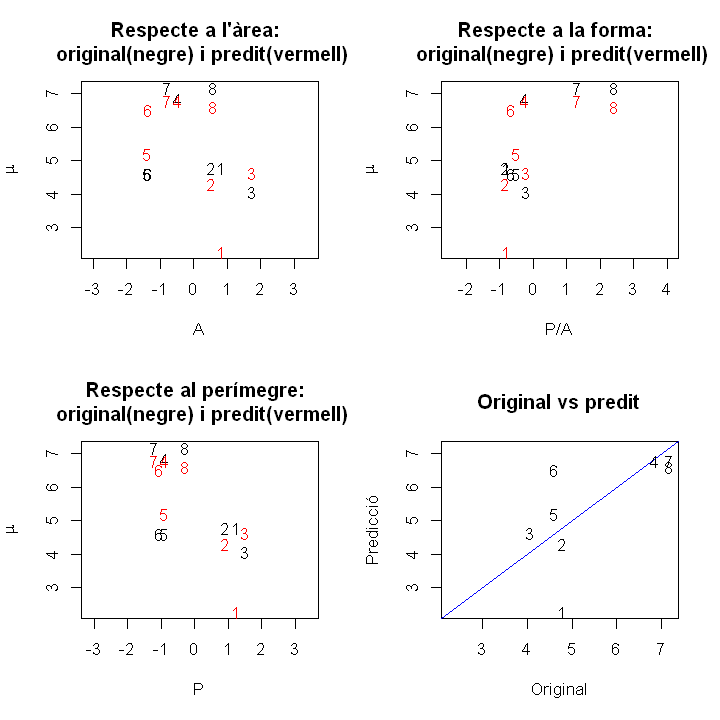

In [18]:
par(mfcol=c(2,2))

margins.y <- list(max(max(testData$perm), max(pred)), min(min(testData$perm), min(pred)))
margins.x <- list(max(testData$area), min(testData$area))
margins <- data.frame(x = margins.x, y = margins.y)

plot(margins.x, margins.y, col="white", asp=1, xlab="A", ylab=expression(mu), main="Respecte a l'àrea: \n original(negre) i predit(vermell)")
text(testData$area, testData$perm, col="black")
text(testData$area, pred, col="red")

margins.x <- list(max(testData$peri), min(testData$peri))

plot(margins.x, margins.y, col="white", asp=1, xlab="P", ylab=expression(mu), main="Respecte al perímegre: \n original(negre) i predit(vermell)")
text(testData$peri, testData$perm, col="black")
text(testData$peri, pred, col="red")

margins.x <- list(max(testData$shape), min(testData$shape))

plot(margins.x, margins.y, col="white", asp=1, xlab="P/A", ylab=expression(mu), main="Respecte a la forma: \n original(negre) i predit(vermell)")
text(testData$shape, testData$perm, col="black")
text(testData$shape, pred, col="red")

plot(margins.y, margins.y, col="white", main="Original vs predit", xlab="Original", ylab="Predicció")
abline(coef = c(0,1), col="blue")
text(testData$perm, pred)